In [1]:
 !git clone https://github.com/Limani123/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 2124, done.
remote: Counting objects: 100% (2124/2124), done.
remote: Compressing objects: 100% (2123/2123), done.
remote: Total 2124 (delta 0), reused 2124 (delta 0), pack-reused 0
Receiving objects: 100% (2124/2124), 316.11 MiB | 28.12 MiB/s, done.
Checking out files: 100% (2100/2100), done.


In [1]:
 !pip install split-folders

In [0]:
import split_folders
split_folders.ratio('Dataset/Images', output="output", seed=1337, ratio=(.6, .2,.2)) 

In [0]:
!rm -rf output

In [3]:
# add images to train valid and test dir
import os, random,shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'output/train'
validation_dir = 'output/val' 
test_dir = 'output/test'

train_size, validation_size, test_size = 1260, 420, 420

img_width, img_height = 224, 224

Using TensorFlow backend.


In [0]:
# resnet 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import load_model
#from keras.applications import resnet
conv_base = ResNet50(weights= 'imagenet', include_top=False, input_shape=(img_width,img_height,3))


In [4]:
# googlenet inception
from keras.applications.inception_v3 import InceptionV3
# from keras.models import model_from_json

conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width,img_height,3))

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 8s 0us/step


In [6]:
conv_base.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_1 (InputLayer)                             (None, 224, 224, 3)              0                                                                   
______________________________________________________________________________________________________________________________________________________
conv2d_1 (Conv2D)                                (None, 111, 111, 32)             864               input_1[0][0]                                     
______________________________________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)       (None, 111, 111, 32)             96          

In [0]:
conv_base.summary()

In [32]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation
from keras.models import Model

conv_base.layers.pop()
conv_base.outputs = [conv_base.layers[-1].output]
conv_base.layers[-1].outbound_nodes = []
conv_base.add(Dense(21, activation='softmax'))
conv_base.summary()

AttributeError: ignored

In [23]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,21))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)
'''
num_classes=21
features, labels = dict(), dict()
def build_fully_connected(input_shape, num_classes):
    
    model = Sequential()
    model.add(Flatten(input_shape=(7,7,2048)))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
             
model = build_fully_connected(input_shape=train_features.shape[1:], num_classes=num_classes)
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_fit_history = model.fit(train_features, train_labels, batch_size=32, epochs=50,
                              verbose=2, validation_data = (validation_features, validation_labels))'''

Found 1260 images belonging to 21 classes.
Found 420 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


"\nnum_classes=21\nfeatures, labels = dict(), dict()\ndef build_fully_connected(input_shape, num_classes):\n    \n    model = Sequential()\n    model.add(Flatten(input_shape=(7,7,2048)))\n    model.add(Dense(256))\n    model.add(Activation('relu'))\n    model.add(Dropout(0.5))\n    model.add(Dense(num_classes, activation='softmax'))\n    return model\n             \nmodel = build_fully_connected(input_shape=train_features.shape[1:], num_classes=num_classes)\nadam = optimizers.Adam(lr=0.0001)\nmodel.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])\nmodel_fit_history = model.fit(train_features, train_labels, batch_size=32, epochs=50,\n                              verbose=2, validation_data = (validation_features, validation_labels))"

In [19]:
num_classes=21
features, labels = dict(), dict()
def build_fully_connected(input_shape, num_classes):
    
    model = Sequential()
    model.add(Flatten(input_shape=(5,5,2048)))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
             
model = build_fully_connected(input_shape=train_features.shape[1:], num_classes=num_classes)
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_fit_history = model.fit(train_features, train_labels, batch_size=32, epochs=20,
                              verbose=2, validation_data = (validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1260 samples, validate on 420 samples
Epoch 1/20
 - 3s - loss: 2.2950 - acc: 0.3944 - val_loss: 0.8221 - val_acc: 0.7857
Epoch 2/20
 - 1s - loss: 0.8392 - acc: 0.7500 - val_loss: 0.5472 - val_acc: 0.8524
Epoch 3/20
 - 1s - loss: 0.4895 - acc: 0.8524 - val_loss: 0.4550 - val_acc: 0.8786
Epoch 4/20
 - 1s - loss: 0.3024 - acc: 0.9032 - val_loss: 0.3573 - val_acc: 0.8952
Epoch 5/20
 - 1s - loss: 0.2183 - acc: 0.9460 - val_loss: 0.3433 - val_acc: 0.8905
Epoch 6/20
 - 1s - loss: 0.1327 - acc: 0.9667 - val_loss: 0.3092 - val_acc: 0.9048
Epoch 7/20
 - 1s - loss: 0.1220 - acc: 0.9651 - val_loss: 0.3331 - val_acc: 0.8976
Epoch 8/20
 - 1s - loss: 0.0918 - acc: 0.9746 - val_loss: 0.3002 - val_acc: 0.9119
Epoch 9/20
 - 1s - loss: 0.0867 - acc: 0.9730 - val_loss: 0.3078 - val_acc: 0.9143
Epoch 10/20
 - 1s - loss: 0.0919 - acc: 0.9738 - val_loss: 0.2832 - val_acc: 0.9071
Epoch 1

In [24]:
train_labels.shape

(1260, 21)

In [0]:
labels_train = []
labels_validation = []
labels_test = []
for i in range(len(train_labels)):
  labels_train.append(np.argmax(train_labels[i]))
for i in range(len(validation_labels)):
  labels_validation.append(np.argmax(validation_labels[i]))
  
for i in range(len(test_labels)):
  labels_test.append(np.argmax(test_labels[i]))  
  

In [0]:
features = np.concatenate((train_features, validation_features))
labels = np.concatenate((labels_train, labels_validation))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [0]:
def scale(X, eps = 0.001):
	# scale the data points s.t the columns of the feature space
	# (i.e the predictors) are within the range [0, 1]
	return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

In [27]:
X_train, y_train = features.reshape(1680,5*5*2048), labels
X_train = scale(X_train)
X_test = scale(test_features.reshape(420,5*5*2048))
y_test = labels_test
# X_test.shape
# X_train = np.transpose(X_train)
y_train.shape

(1680,)

In [0]:
X_train.shape

In [28]:
import keras
y_train = keras.utils.to_categorical(y_train,21)
y_test = keras.utils.to_categorical(y_test,21)
y_train.shape

(1680, 21)

In [0]:
# import pandas as pd
# from sklearn.decomposition import PCA
# pca = PCA(n_components=400)
# principalComponents = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = principalComponents)
# principalComponents1 = pca.fit_transform(X_test)
# principalDf1 = pd.DataFrame(data = principalComponents1)



In [0]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
import pandas as pd
import numpy as np
import keras

In [0]:
#Denoising autoencoder
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [15]:
## encoding architecture
input_layer = Input(shape=(51200,))
hidden_layer = Dense(200, activation='relu')(input_layer)
output_layer   = Dense(51200, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_layer,output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scale(X_train), scale(x_train_noisy), epochs=20, batch_size=32, validation_data=(scale(X_test), scale(x_test_noisy) ),verbose=1)

#model
output  = Dense(21, activation='softmax')(output_layer)
model = Model(input_layer, output)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model_log = model.fit(scale(X_train), y_train, epochs=20, batch_size=32, validation_data=(scale(X_test), y_test ),verbose=1)

#end here

Instructions for updating:
Use tf.cast instead.
Train on 1680 samples, validate on 420 samples
Epoch 1/20
1680/1680 [==============================] - 4s 3ms/step - loss: 0.1040 - val_loss: 0.1010
Epoch 2/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0949 - val_loss: 0.1006
Epoch 3/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0943 - val_loss: 0.1012
Epoch 4/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0939 - val_loss: 0.1001
Epoch 5/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0937 - val_loss: 0.1026
Epoch 6/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0937 - val_loss: 0.1003
Epoch 7/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0933 - val_loss: 0.0999
Epoch 8/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0929 - val_loss: 0.1002
Epoch 9/20
1680/1680 [==============================] - 2s 1ms/step - loss: 0.0924 - val_

** Plot training loss vs. validation loss**

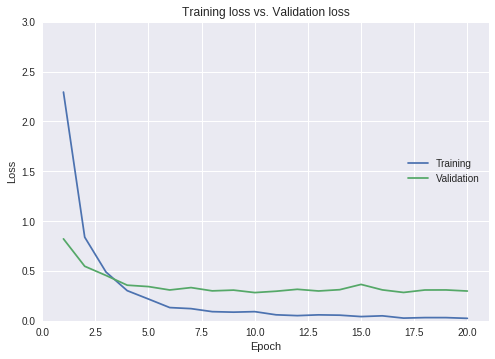

In [21]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['loss'])
max_loss = max(max(model_fit_history.history['loss']), max(model_fit_history.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['loss'])
plt.plot(x, model_fit_history.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

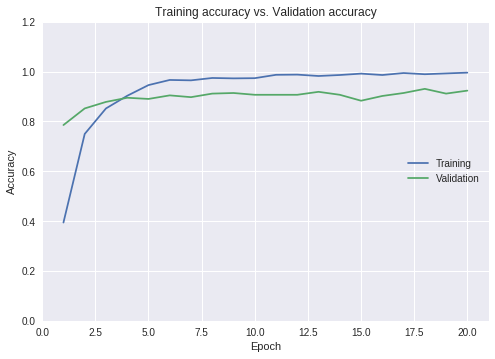

In [22]:
matplotlib.style.use('seaborn')
epochs = len(model_fit_history.history['acc'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, model_fit_history.history['acc'])
plt.plot(x, model_fit_history.history['val_acc'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

In [0]:
##Dense autoencoder - acc - 40%

input_img = Input(shape=(51200,))
encoded = Dense(1000, activation='relu')(input_img)
#encoded = Dense(5000, activation='relu')(encoded)
encoded = Dense(300, activation='relu')(encoded)

decoded = Dense(1000, activation='relu')(encoded)
# decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(51200, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Sparse autoencoder - acc - 40%

In [0]:
output_layer  = Dense(21, activation='softmax')(decoded)
autoencoder.fit(scale(X_train), scale(X_train), epochs=10, batch_size=32, validation_data=(scale(X_test), scale(X_test) ),verbose=1)

model = Model(input_img, output_layer)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model_log = model.fit(scale(X_train), y_train, epochs=20, batch_size=32, validation_data=(scale(X_test), y_test ),verbose=1)

In [0]:
## simple autoencoder - 86-90%

## input layer
input_layer = Input(shape=(51200,))

## encoding architecture
encode_layer1 = Dense(200, activation='relu')(input_layer)
# encode_layer2 = Dense(5000, activation='relu')(encode_layer1)
# encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(51200, activation='sigmoid')(encode_layer1)

## decoding architecture
# decode_layer1 = Dense(500, activation='relu')(latent_view)
# decode_layer2 = Dense(5000, activation='relu')(decode_layer1)
# decode_layer3 = Dense(15000, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(21, activation='softmax')(latent_view)

autoencoder = Model(input_layer,latent_view)

autoencoder.compile(optimizer='adam', loss='mse')
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
# autoencoder.fit(principalDf, principalDf, epochs=20, batch_size=32, validation_data=(principalDf1,principalDf1 ),verbose=1)
autoencoder.fit(scale(X_train), scale(X_train), epochs=20, batch_size=32, validation_data=(scale(X_test), scale(X_test) ),verbose=1)

model = Model(input_layer, output_layer)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model_log = model.fit(scale(X_train), y_train, epochs=20, batch_size=32, validation_data=(scale(X_test), y_test ),verbose=1)


In [0]:
model.summary()